In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## SMD
SMD (Server Machine Dataset) is a 5-week-long dataset which was collected from a large Internet company.

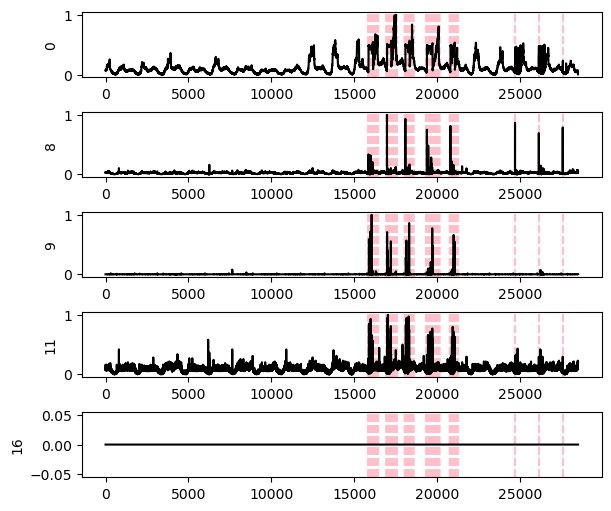

In [4]:
dataset_name = 'machine-1-1'

X = pd.read_csv(f'ServerMachineDataset/test/{dataset_name}.txt', header=None)
y = pd.read_csv(f'ServerMachineDataset/test_label/{dataset_name}.txt', header=None)

num_features = X.shape[1]

# all features
# fig, axes = plt.subplots(num_features, 1, figsize=(6, num_features), constrained_layout=True)
# selected_features = range(0, X.shape[1]+1)

# only selected features
# selected_features = [0, 8, 9, 11, 12, 13, 14]
selected_features = [0, 8, 9, 11, 16]
fig, axes = plt.subplots(len(selected_features), 1, figsize=(6, len(selected_features)), constrained_layout=True)

# Plot each feature
for i in range(num_features):
    if i in selected_features:
        plot_i = selected_features.index(i)
        for idx in y[y[0] == 1].index:
            axes[plot_i].axvline(x=idx, color='pink', linestyle='--')
        axes[plot_i].plot(X.index, X[i], color='black')
        axes[plot_i].set_ylabel(i)

# SMAP
SMAP (Soil Moisture Active Passive satellite)

There are three categories of anomalies – point, contextual, and collective [9]. 

* Point anomalies are single values that fall within low-density regions of values;
* collective anomalies indicate that a sequence of values is anomalous rather than any single value by itself;
* contextual anomalies are single values that do not fall within low-density regions yet are anomalous with regard to local values.

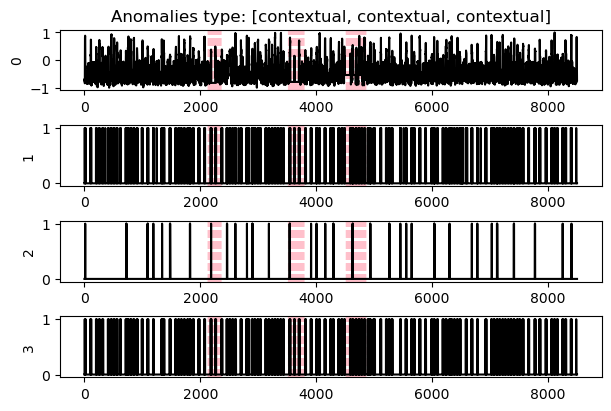

In [2]:
import ast
import numpy as np

spacecraft = 'SMAP'
chanId = 'P-1'

X = np.load(f'data/test/{chanId}.npy')

labeled_anomalies = pd.read_csv('data/labeled_anomalies.csv')
chan_anomalies = labeled_anomalies[labeled_anomalies['spacecraft'] == spacecraft][labeled_anomalies['chan_id'] == chanId]

list_of_lists = ast.literal_eval(chan_anomalies['anomaly_sequences'].values[0])
anomalies_range = np.array(list_of_lists)

anomaly_indices = []
for i, anomaly in enumerate(anomalies_range):
  anomaly_indices.extend(np.arange(anomaly[0], anomaly[1]+1))

y = np.array(anomaly_indices)

# num_features = X.shape[1]
num_features = 4 # showing only first 4 features

# Create a figure and set of subplots
fig, axes = plt.subplots(num_features, 1, figsize=(6, num_features), constrained_layout=True)

axes[0].set_title(f'Anomalies type: {chan_anomalies["class"].values[0]}')
# Plot each feature
for i in range(num_features):
    for idx in y:
        axes[i].axvline(x=idx, color='pink', linestyle='--')
    axes[i].plot(X[:, i], color='black')
    axes[i].set_ylabel(i)

# MSL
(Mars Science Laboratory rover)

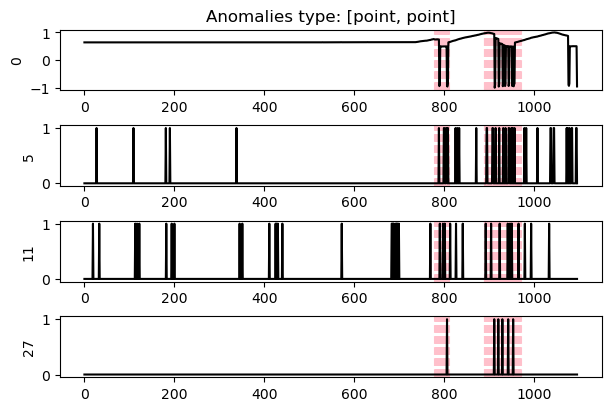

In [9]:
import ast
import numpy as np

spacecraft = 'MSL'
chanId = 'T-9'

X = np.load(f'data/test/{chanId}.npy')

labeled_anomalies = pd.read_csv('data/labeled_anomalies.csv')
chan_anomalies = labeled_anomalies[labeled_anomalies['spacecraft'] == spacecraft][labeled_anomalies['chan_id'] == chanId]

list_of_lists = ast.literal_eval(chan_anomalies['anomaly_sequences'].values[0])
anomalies_range = np.array(list_of_lists)

anomaly_indices = []
for i, anomaly in enumerate(anomalies_range):
  anomaly_indices.extend(np.arange(anomaly[0], anomaly[1]+1))

y = np.array(anomaly_indices)

selected_features = [0, 5, 11, 27]

num_features = X.shape[1]

# Create a figure and set of subplots
fig, axes = plt.subplots(len(selected_features), 1, figsize=(6, len(selected_features)), constrained_layout=True)

axes[0].set_title(f'Anomalies type: {chan_anomalies["class"].values[0]}')

for i in range(num_features):
    if i in selected_features:
        plot_i = selected_features.index(i)
        for idx in y:
          axes[plot_i].axvline(x=idx, color='pink', linestyle='--')
        axes[plot_i].plot(X[:, i], color='black')
        axes[plot_i].set_ylabel(i)